### **Part 1: Data Analysis and Visualization**

#### **Task 1: Dataset Selection & Exploration**

**Step 1: Import Datasets**

In [1]:
import os

#Navigate. to the audio clip directory
audio_dir = '/content/drive/MyDrive/Colab_Notebooks/M2M Tech/Mozilla Common Voice/clips'

#List the audio file extensions
audio_extensions = [file.split('.')[-1] for file in os.listdir(audio_dir)]

#Print the unique audio file extensions
print(set(audio_extensions))

{'mp3'}


**Step 2: Inspect Transcription Text Files**

The transcription text files are in TSV(Tab Seperated Values) format. Lets load one of the files.

In [2]:
import pandas as pd
import numpy as np

#Load the validation.tsv file
validated_df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/M2M Tech/Mozilla Common Voice/validated.tsv', sep='\t')

copy_df = validated_df.copy()

#Display the first few rows of the dataframe
validated_df.head()

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,031903093b6fa1aeb0a243843eb9ed57baf6e99d1f8f92...,common_voice_en_41383256.mp3,f19a785911b1a3b1338e3eb5cc785e58b8381d21ec7c33...,The outer rim has undergone some erosion due t...,NaN,2,0,NaN,NaN,NaN,NaN,en,NaN
1,058fe5b1170aa09ef3f1092b179384639bc46ac53c1675...,common_voice_en_41823983.mp3,f50360e1be367d8155b3c8340f0b3d38d1e6701df79dc5...,"For purposes of this definition, the intent ma...",NaN,3,0,fifties,female_feminine,"United States English,Washington State",NaN,en,NaN
2,08190396a5c298331813531d1a832b56d8ffe44aaedcb7...,common_voice_en_41881685.mp3,f4f3a5714cc36a9abbabf78a33feb4a9c368005f1f4bf5...,"Bennett was educated at Lawnswood High School,...",NaN,2,0,fourties,female_feminine,"United States English,southern draw",NaN,en,NaN
3,14698ee63cabe08b43f0faa93304202d1e6ffeaa2cdf86...,common_voice_en_41799514.mp3,f4d04f6e48777c3ad180c629858a19fdfa4cb875d2bb22...,These rules became known as Admiral-Lord Mount...,NaN,2,0,twenties,NaN,Japan English,NaN,en,NaN
4,28d8f8a88afad9eb9e5b36ee84bd4c5ba84137310da15f...,common_voice_en_41552032.mp3,f262ed293fa5fe0986d1e7a80b5bbae11205f8089a1857...,The grouping traditionally called apes is brac...,NaN,2,0,NaN,NaN,"Canadian English,English Hungarian",NaN,en,NaN


In [3]:
validated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        250 non-null    object 
 1   path             250 non-null    object 
 2   sentence_id      250 non-null    object 
 3   sentence         250 non-null    object 
 4   sentence_domain  0 non-null      float64
 5   up_votes         250 non-null    int64  
 6   down_votes       250 non-null    int64  
 7   age              230 non-null    object 
 8   gender           122 non-null    object 
 9   accents          240 non-null    object 
 10  variant          0 non-null      float64
 11  locale           250 non-null    object 
 12  segment          0 non-null      float64
dtypes: float64(3), int64(2), object(8)
memory usage: 25.5+ KB


### **Task 2: Data Cleaning**

**Step 1: Check for na's**


In [4]:
# Check for missing values
print(validated_df.isnull().sum())

# Drop rows with missing values
validated_df = validated_df.fillna('Unknown')
print('\n')
# Check the updated DataFrame
print(validated_df.head())

client_id            0
path                 0
sentence_id          0
sentence             0
sentence_domain    250
up_votes             0
down_votes           0
age                 20
gender             128
accents             10
variant            250
locale               0
segment            250
dtype: int64


                                           client_id  \
0  031903093b6fa1aeb0a243843eb9ed57baf6e99d1f8f92...   
1  058fe5b1170aa09ef3f1092b179384639bc46ac53c1675...   
2  08190396a5c298331813531d1a832b56d8ffe44aaedcb7...   
3  14698ee63cabe08b43f0faa93304202d1e6ffeaa2cdf86...   
4  28d8f8a88afad9eb9e5b36ee84bd4c5ba84137310da15f...   

                           path  \
0  common_voice_en_41383256.mp3   
1  common_voice_en_41823983.mp3   
2  common_voice_en_41881685.mp3   
3  common_voice_en_41799514.mp3   
4  common_voice_en_41552032.mp3   

                                         sentence_id  \
0  f19a785911b1a3b1338e3eb5cc785e58b8381d21ec7c33...   
1  f50360e1be367d8155b3c83

In [5]:
print(validated_df.columns)

Index(['client_id', 'path', 'sentence_id', 'sentence', 'sentence_domain',
       'up_votes', 'down_votes', 'age', 'gender', 'accents', 'variant',
       'locale', 'segment'],
      dtype='object')


**Task 2: Clean up age column and change datatype**

In [6]:
#Get unique values from the age column
unique_ages = validated_df['age'].unique()

#Print the unique ages
print(unique_ages)

['Unknown' 'fifties' 'fourties' 'twenties' 'sixties' 'thirties'
 'seventies' 'teens']


In [7]:
# Define the age mapping
age_mapping = {'Unknown':np.nan, 'teens':15, 'twenties':25, 'thirties':35, 'fourties':45, 'fifties':55, 'sixties':65, 'seventies':75}

#Replace string values with numeric ages
validated_df['age'] = validated_df['age'].replace(age_mapping).astype('float64')

print(validated_df['age'])
print('\n')
print(validated_df['age'].describe())

0       NaN
1      55.0
2      45.0
3      25.0
4       NaN
       ... 
245    65.0
246    65.0
247    65.0
248    65.0
249    65.0
Name: age, Length: 250, dtype: float64


count    230.00000
mean      42.00000
std       18.81071
min       15.00000
25%       25.00000
50%       35.00000
75%       65.00000
max       75.00000
Name: age, dtype: float64


<ipython-input-7-91966202e9d2>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validated_df['age'] = validated_df['age'].replace(age_mapping).astype('float64')


**Task 3: Clean up gender and accents column and change datatype**

In [8]:
# Get unique values for gender
gender_uniques = validated_df['gender'].unique()
print("Unique values for gender:")
print(gender_uniques)
print('\n')

# Get unique values for accent
accent_uniques = validated_df['accents'].unique()
print("\nUnique values for accents:")
print(accent_uniques)

Unique values for gender:
['Unknown' 'female_feminine' 'male_masculine' 'non-binary' 'transgender']



Unique values for accents:
['Unknown' 'United States English,Washington State'
 'United States English,southern draw' 'Japan English'
 'Canadian English,English Hungarian' 'United States English'
 'England English,Kent' 'England English'
 'India and South Asia (India, Pakistan, Sri Lanka),South India,Kannadiga'
 'chicago italian' 'United States English,Chicago/Midwestern'
 'Southern African (South Africa, Zimbabwe, Namibia)'
 'India and South Asia (India, Pakistan, Sri Lanka)' 'Filipino'
 'French speaking english' 'Korean' 'Israeli English' 'Canadian English'
 'British with slightly Brazilian accent,British and slightly Brazilian '
 'Californian Accent' 'United States English,German,Russian'
 'United States English,learnt from Spanish' 'geordie ,England Northern'
 'United States English,Malaysian English' 'Japanese English'
 'Scottish English']


In [9]:
gender_mapping = {
    'Unknown': 'Unknown',
    'female_feminine': 'Female',
    'male_masculine': 'Male',
    'non-binary': 'Non-binary',
    'transgender': 'Transgender'
}

accent_mapping = {
    'Unknown': 'Unknown',
    'United States English,Washington State': 'US English',
    'United States English,southern draw': 'US English (Southern)',
    'United States English,Chicago/Midwestern': 'US English (Midwestern)',
    'United States English,German,Russian': 'US English (European influence)',
    'United States English,learnt from Spanish': 'US English (Latin American influence)',
    'United States English,Malaysian English': 'US English (Asian influence)',
    'Canadian English': 'Canadian English',
    'Canadian English,English Hungarian': 'Canadian English (Eastern European influence)',
    'England English': 'UK English',
    'England English,Kent': 'UK English (Southern)',
    'British with slightly Brazilian accent,British and slightly Brazilian ': 'UK English (Latin American influence)',
    'Scottish English': 'UK English (Scottish)',
    'geordie ,England Northern': 'UK English (Northern)',
    'India and South Asia (India, Pakistan, Sri Lanka)': 'South Asian English',
    'India and South Asia (India, Pakistan, Sri Lanka),South India,Kannadiga': 'South Asian English (Indian influence)',
    'Japan English': 'Japanese English',
    'Japanese English': 'Japanese English',
    'Korean': 'Korean English',
    'Israeli English': 'Middle Eastern English',
    'Filipino': 'Southeast Asian English',
    'French speaking english': 'European English (French influence)',
    'Southern African (South Africa, Zimbabwe, Namibia)': 'African English',
    'chicago italian': 'US English (Italian influence)',
    'Californian Accent': 'US English (West Coast)'
}

In [10]:
validated_df['gender'] = validated_df['gender'].replace(gender_mapping)
validated_df['accents'] = validated_df['accents'].replace(accent_mapping)

In [11]:
validated_df.head()

,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment
0,031903093b6fa1aeb0a243843eb9ed57baf6e99d1f8f92...,common_voice_en_41383256.mp3,f19a785911b1a3b1338e3eb5cc785e58b8381d21ec7c33...,The outer rim has undergone some erosion due t...,Unknown,2,0,NaN,Unknown,Unknown,Unknown,en,Unknown
1,058fe5b1170aa09ef3f1092b179384639bc46ac53c1675...,common_voice_en_41823983.mp3,f50360e1be367d8155b3c8340f0b3d38d1e6701df79dc5...,"For purposes of this definition, the intent ma...",Unknown,3,0,55.0,Female,US English,Unknown,en,Unknown
2,08190396a5c298331813531d1a832b56d8ffe44aaedcb7...,common_voice_en_41881685.mp3,f4f3a5714cc36a9abbabf78a33feb4a9c368005f1f4bf5...,"Bennett was educated at Lawnswood High School,...",Unknown,2,0,45.0,Female,US English (Southern),Unknown,en,Unknown
3,14698ee63cabe08b43f0faa93304202d1e6ffeaa2cdf86...,common_voice_en_41799514.mp3,f4d04f6e48777c3ad180c629858a19fdfa4cb875d2bb22...,These rules became known as Admiral-Lord Mount...,Unknown,2,0,25.0,Unknown,Japanese English,Unknown,en,Unknown
4,28d8f8a88afad9eb9e5b36ee84bd4c5ba84137310da15f...,common_voice_en_41552032.mp3,f262ed293fa5fe0986d1e7a80b5bbae11205f8089a1857...,The grouping traditionally called apes is brac...,Unknown,2,0,NaN,Unknown,Canadian English (Eastern European influence),Unknown,en,Unknown


### **Task 3: Generate Basic Statistics**

In [12]:
# Calculate word frequency
word_freq = validated_df['sentence'].apply(lambda x:len(x.split()))
print("word frequency:")
print(word_freq.describe())

print('\n')
# Calculate sentence length
sentence_length = validated_df['sentence'].apply(lambda x:len(x))
print("sentence length:")
print( sentence_length.describe())
print('\n')

#calculate punctuation use
punctuation_use = validated_df['sentence'].apply(lambda x: sum(not c.isalnum() for c in x))
print("Punctuation Use:")
print(punctuation_use.describe())


word frequency:
count    250.000000
mean       9.964000
std        2.816101
min        3.000000
25%        8.000000
50%       10.000000
75%       12.000000
max       14.000000
Name: sentence, dtype: float64


sentence length:
count    250.000000
mean      61.100000
std       19.364657
min       10.000000
25%       48.000000
50%       61.000000
75%       74.750000
max      102.000000
Name: sentence, dtype: float64


Punctuation Use:
count    250.000000
mean      10.668000
std        3.113285
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       17.000000
Name: sentence, dtype: float64


### **Task 4: Visualizations**

In [13]:
import plotly.express as px
from plotly.subplots import make_subplots

# Create a figure with three subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=['Age Distribution', 'Gender Distribution', 'Accent Distribution'], vertical_spacing=0.1)

# Add the plots to the subplots
fig.add_trace(px.histogram(validated_df, x='age', color_discrete_sequence=['rgba(0, 0, 255, 0.5)']).data[0], row=1, col=1)
fig.add_trace(px.bar(validated_df, x='gender', color_discrete_sequence=px.colors.qualitative.Pastel1).data[0], row=2, col=1)
fig.add_trace(px.bar(validated_df, x='accents', color_discrete_sequence=px.colors.qualitative.Pastel).data[0], row=3, col=1)

# Update the layout to make the plots larger
fig.update_layout(height=1000, margin=dict(l=50, r=50, t=100, b=50))

# Apply log scale to the y-axis of the Accent Distribution chart (yaxis3)
fig.update_yaxes(type='log', row=3, col=1)

# Show the plot
fig.show()

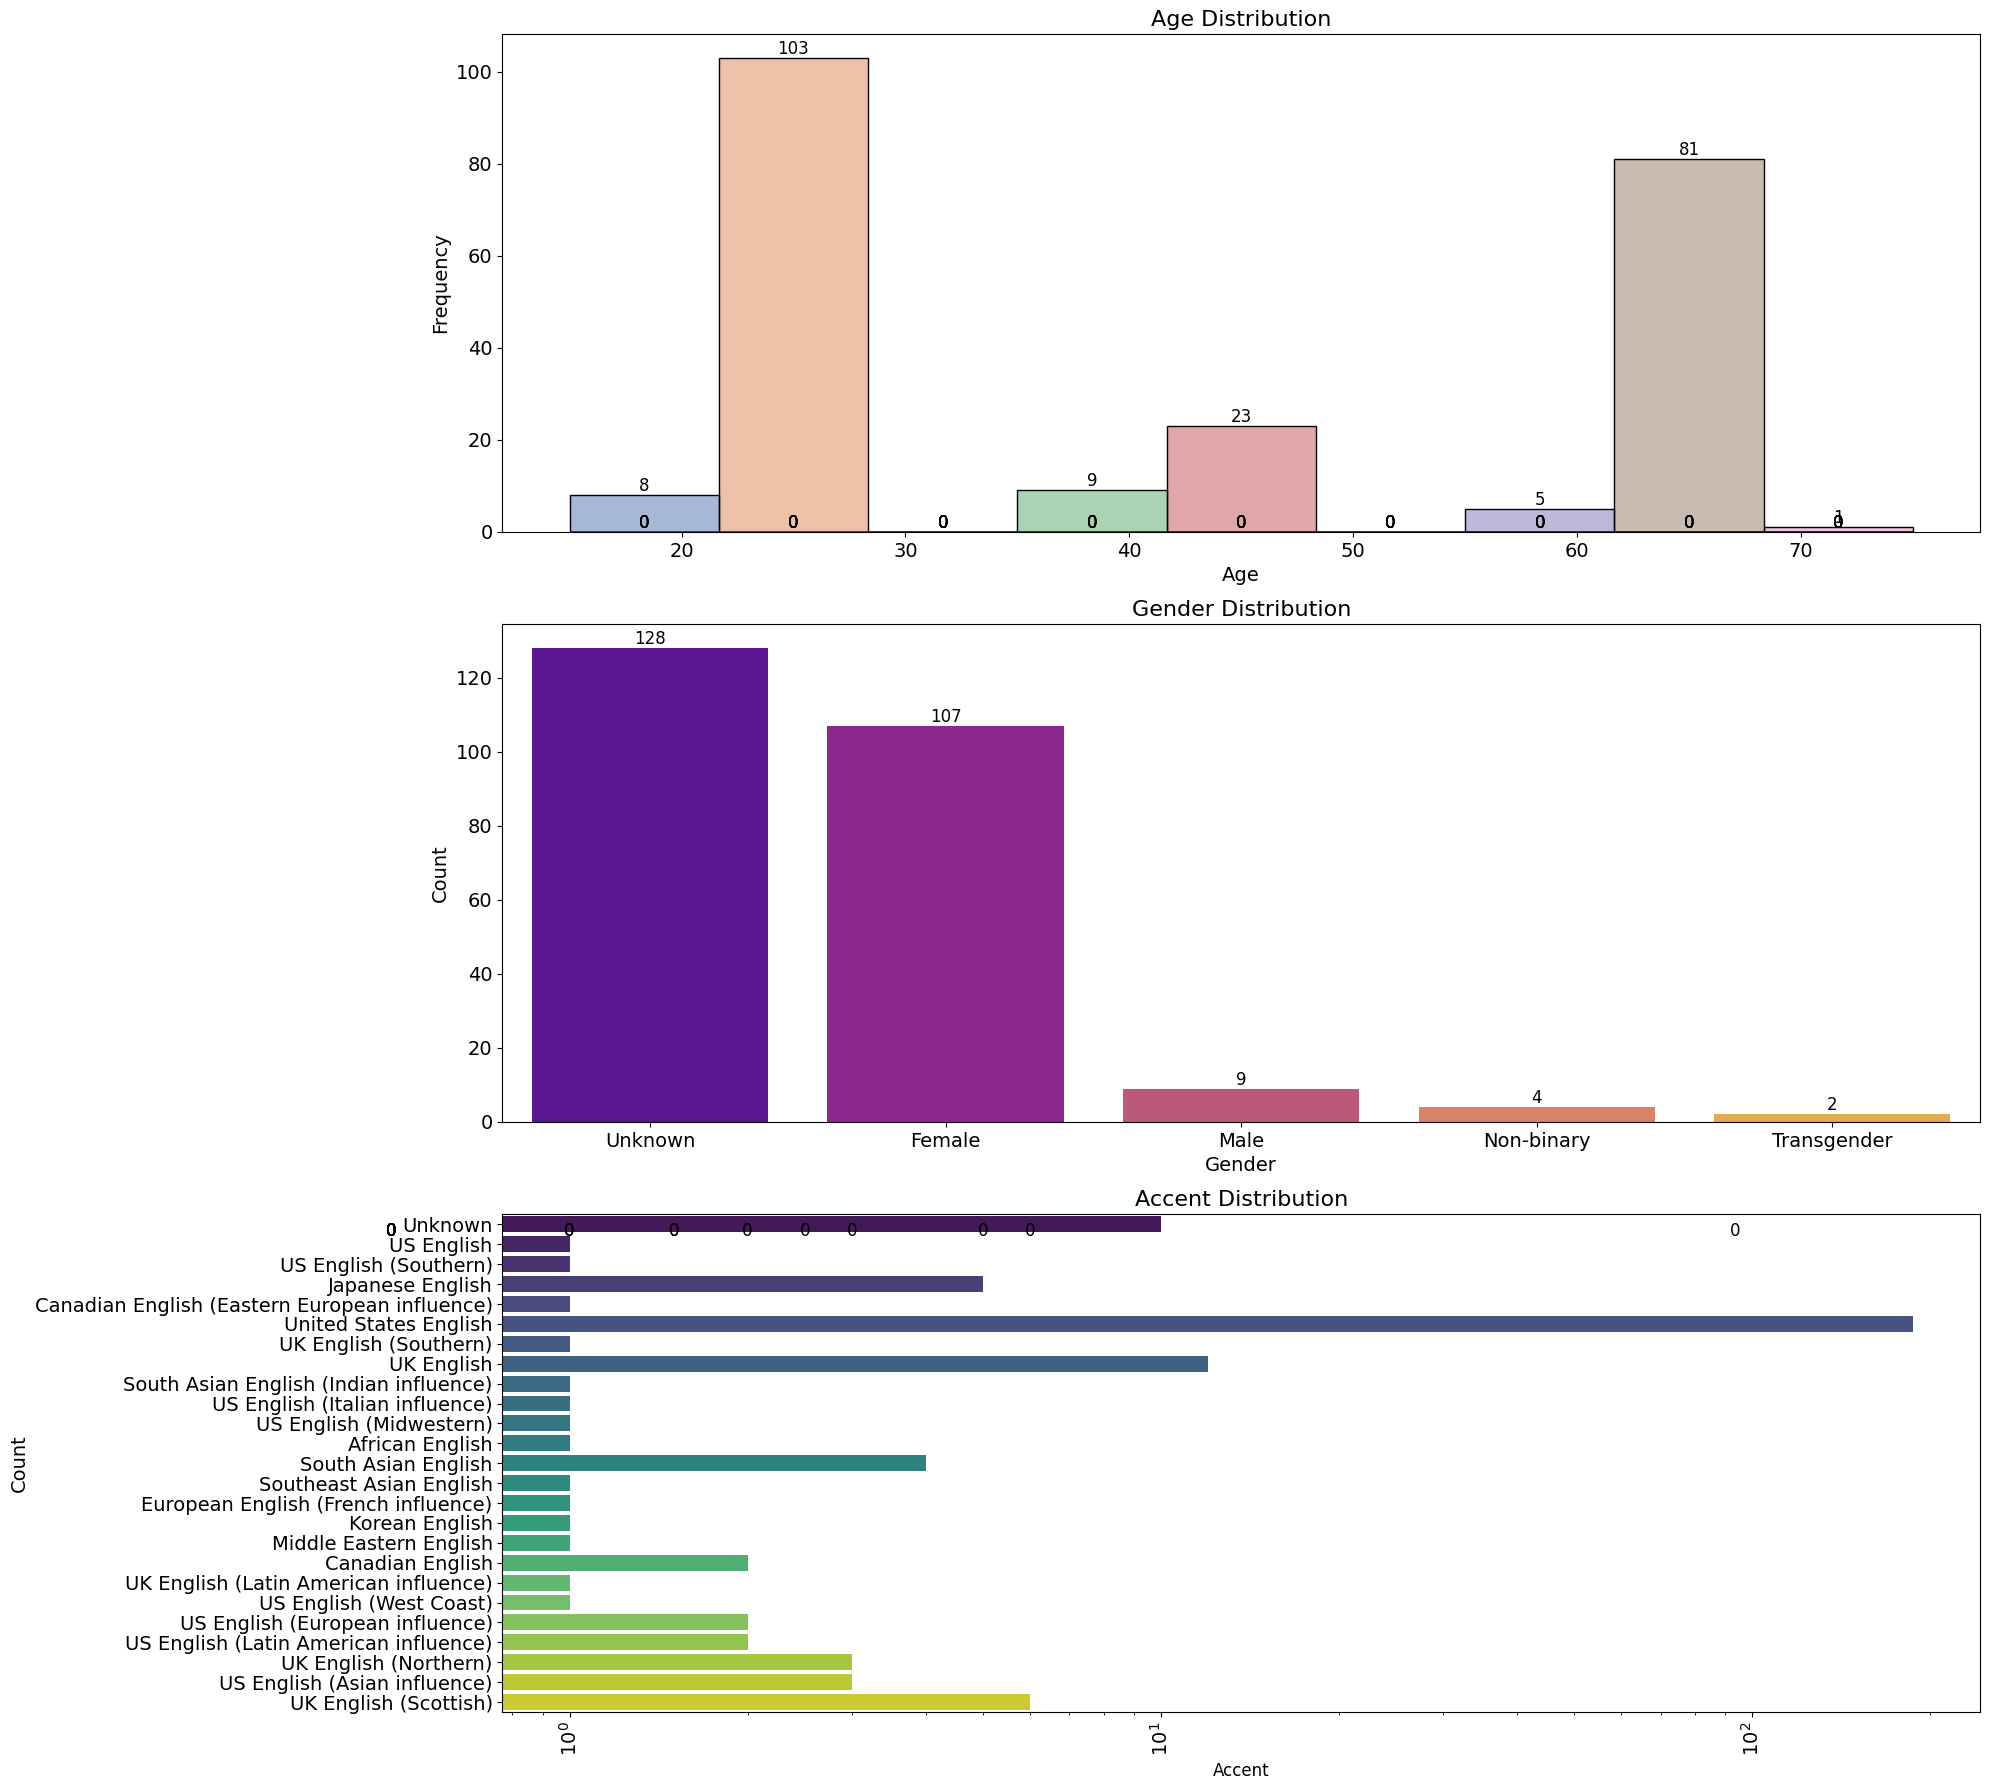

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define plot settings
figsize = (20, 18)
bins = 20
rotation = 90

# Create a figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=figsize)

# Define plot functions
def plot_age_distribution(ax):
    sns.histplot(x='age', data=validated_df, hue='age', palette='deep', legend=False, ax=ax)
    ax.set_title('Age Distribution', fontsize=16)
    ax.set_xlabel('Age', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    for patch in ax.patches:
        ax.text(patch.get_x() + patch.get_width()/2, patch.get_height(), str(int(patch.get_height())), fontsize=12, ha='center', va='bottom', color='black')

def plot_gender_distribution(ax):
    sns.countplot(x='gender', data=validated_df, hue='gender', palette='plasma', legend=False, ax=ax)
    ax.set_title('Gender Distribution', fontsize=16)
    ax.set_xlabel('Gender', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    for patch in ax.patches:
        ax.text(patch.get_x() + patch.get_width()/2, patch.get_height(), str(int(patch.get_height())), fontsize=12, ha='center', va='bottom', color='black')

def plot_accent_distribution(ax):
    sns.countplot(y='accents', data=validated_df, hue='accents', palette='viridis', legend=False, ax=ax)
    ax.set_title('Accent Distribution', fontsize=16)
    ax.tick_params(axis='x', rotation=rotation)
    ax.tick_params(axis='both', labelsize=14)
    ax.set_xlabel('Accent', fontsize=12)
    ax.set_ylabel('Count', fontsize=14)
    ax.set_xscale('log')
    for patch in ax.patches:
        ax.text(patch.get_x() + patch.get_width()/2, patch.get_height(), str(int(patch.get_height())), fontsize=12, ha='center', va='bottom', color='black')


# Plot the distributions
plot_age_distribution(axs[0])
plot_gender_distribution(axs[1])
plot_accent_distribution(axs[2])

# Show the plot
plt.tight_layout()
plt.show()

### **Summary**
The analysis reveals imbalances in age, gender, and accent distributions. The dataset is dominated by users in their 20s and 60s, with underrepresentation in the 30s and 50s.

There's a bias towards female speakers, and while the dataset includes non-binary and transgender speakers, their numbers are small.


Accent distribution is also skewed, with "Unknown" accents dominating and underrepresentation of regional variants. These imbalances may impact speech model performance and robustness.


### **Part 2: AI vs Human Transcription Accuracy**

**Step 1: Transcribe Audio with Whisper AI**

In [15]:
!pip install -U openai-whisper jiwer
import whisper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 15.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s et

**Step2: Import Libraries and load transcriptions**

In [16]:
# Load Whisper model (medium for balance of speed/ accuracy)

model = whisper.load_model("medium")

100%|█████████████████████████████████████| 1.42G/1.42G [00:30<00:00, 50.8MiB/s]


In [17]:
# Transcribe first 50 samples (adjust based on Colab resources)

subset = validated_df.head(50)
transcripts = []

for idx, row in subset.iterrows():
    audio_path = os.path.join(audio_dir, row['path'])
    result = model.transcribe(audio_path)
    transcripts.append(result['text'])

subset["ai_transcript"] = transcripts
subset.to_csv("ai_transcripts.csv", index=False)



/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning:

FP16 is not supported on CPU; using FP32 instead

/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning:

FP16 is not supported on CPU; using FP32 instead

/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning:

FP16 is not supported on CPU; using FP32 instead

/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning:

FP16 is not supported on CPU; using FP32 instead

/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning:

FP16 is not supported on CPU; using FP32 instead

/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning:

FP16 is not supported on CPU; using FP32 instead

/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning:

FP16 is not supported on CPU; using FP32 instead

/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:126: UserWarning:

FP

In [20]:
print(subset['ai_transcript'])

0      The out of rim has undergone some erosion due...
1      For the purposes of this definition, the inte...
2      Bennett was educated at Lonswood High School,...
3      These little spochondras are mirror- Dais Mou...
4      The grouping traditionally called apes is bra...
5      The track, Coca Leaf, is made up of vocal sam...
6                He also taught at the same university.
7      Most Naruto video games have been released on...
8      Bold denotes players currently active in inte...
9      At Southside, Greer was an all-state selectio...
10                   Riley and Buffy pursue in his car.
11     The combined company was later renamed Kimbal...
12     It also features puzzles and platforming elem...
13                              It has three platforms.
14     After graduation, she became the administrato...
15           It airs in North America via Dish Network.
16     Instead of signing artists, he makes one-time...
17     After this, the town was rebuilt and simp

In [25]:
# Import Word Error(WER) and Character Error (CER)
!pip install -U jiwer
from jiwer import wer, cer

In [35]:
#Load the dataset with AI-generated transcripts
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/M2M Tech/Mozilla Common Voice/ai_transcripts.csv')

# Ensure columns exist
df = df.dropna(subset=["sentence", "ai_transcript"])
df.head(10)


,client_id,path,sentence_id,sentence,sentence_domain,up_votes,down_votes,age,gender,accents,variant,locale,segment,ai_transcript
0,031903093b6fa1aeb0a243843eb9ed57baf6e99d1f8f92...,common_voice_en_41383256.mp3,f19a785911b1a3b1338e3eb5cc785e58b8381d21ec7c33...,The outer rim has undergone some erosion due t...,Unknown,2,0,NaN,Unknown,Unknown,Unknown,en,Unknown,The out of rim has undergone some erosion due...
1,058fe5b1170aa09ef3f1092b179384639bc46ac53c1675...,common_voice_en_41823983.mp3,f50360e1be367d8155b3c8340f0b3d38d1e6701df79dc5...,"For purposes of this definition, the intent ma...",Unknown,3,0,55.0,Female,US English,Unknown,en,Unknown,"For the purposes of this definition, the inte..."
2,08190396a5c298331813531d1a832b56d8ffe44aaedcb7...,common_voice_en_41881685.mp3,f4f3a5714cc36a9abbabf78a33feb4a9c368005f1f4bf5...,"Bennett was educated at Lawnswood High School,...",Unknown,2,0,45.0,Female,US English (Southern),Unknown,en,Unknown,"Bennett was educated at Lonswood High School,..."
3,14698ee63cabe08b43f0faa93304202d1e6ffeaa2cdf86...,common_voice_en_41799514.mp3,f4d04f6e48777c3ad180c629858a19fdfa4cb875d2bb22...,These rules became known as Admiral-Lord Mount...,Unknown,2,0,25.0,Unknown,Japanese English,Unknown,en,Unknown,These little spochondras are mirror- Dais Mou...
4,28d8f8a88afad9eb9e5b36ee84bd4c5ba84137310da15f...,common_voice_en_41552032.mp3,f262ed293fa5fe0986d1e7a80b5bbae11205f8089a1857...,The grouping traditionally called apes is brac...,Unknown,2,0,NaN,Unknown,Canadian English (Eastern European influence),Unknown,en,Unknown,The grouping traditionally called apes is bra...
5,29f0a09db1abdd5ad550cc754834822748ab17043e7b51...,common_voice_en_41827319.mp3,f506be20f56b00999c323469c384114e27bb5fa0372d0e...,"The track ""Coca Leaf"" is made up of vocal samp...",Unknown,2,0,NaN,Unknown,Unknown,Unknown,en,Unknown,"The track, Coca Leaf, is made up of vocal sam..."
6,302b51de89ba0e815cce38bba05ee858e556375d19c745...,common_voice_en_41526838.mp3,f21bd922ee542930c8c3914edad64557f31004a22a80a1...,He also taught at the same university.,Unknown,4,0,65.0,Female,United States English,Unknown,en,Unknown,He also taught at the same university.
7,31a787d9d9c7203d20fbd2b9590c92dda91ef69e2b36f7...,common_voice_en_41435787.mp3,f1b86bcf63efc1b0117b5587f8803741a5a6917ab44421...,"Most ""Naruto"" video games have been released o...",Unknown,3,0,NaN,Unknown,Unknown,Unknown,en,Unknown,Most Naruto video games have been released on...
8,40ef8f7ec5e58f2ba7b9c934cf57ae928bae5b13662b8f...,common_voice_en_41633128.mp3,f2d2020fe97305b41d4c626ee2963f0984e255e5599105...,Bold denotes players currently active in inter...,Unknown,2,0,35.0,Female,United States English,Unknown,en,Unknown,Bold denotes players currently active in inte...
9,4af8321a13399a2662bef236a736ad5329cb2edfe01eee...,common_voice_en_41586424.mp3,f2872bf6e9d312de78bdcc664bc348936d9039966c4104...,"At South Side, Greer was an all state selectio...",Unknown,2,0,55.0,Female,United States English,Unknown,en,Unknown,"At Southside, Greer was an all-state selectio..."


**Step 3: Compute WER and CER for Each sample**

In [34]:
# Ensure subset is a new copy of the DataFrame
subset = subset.copy()

# Compute WER and CER
subset.loc[:, "wer"] = subset.apply(lambda row: wer(row["sentence"], row["ai_transcript"]), axis=1)
subset.loc[:, "cer"] = subset.apply(lambda row: cer(row["sentence"], row["ai_transcript"]), axis=1)

# Save updated results
subset.to_csv("ai_transcripts_with_metrics.csv", index=False)

# Display average WER and CER
average_wer = subset["wer"].mean()
average_cer = subset["cer"].mean()

print(f"Average WER: {average_wer:.2%}")
print(f"Average CER: {average_cer:.2%}")


Average WER: 14.23%
Average CER: 7.52%


**Step 4: Visualize the Error Rates**

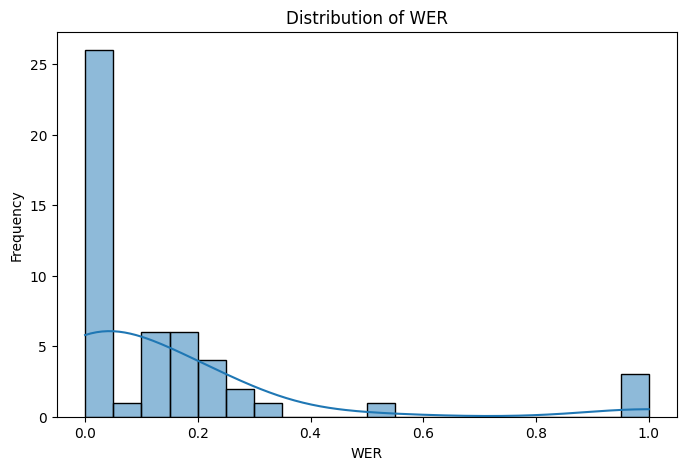

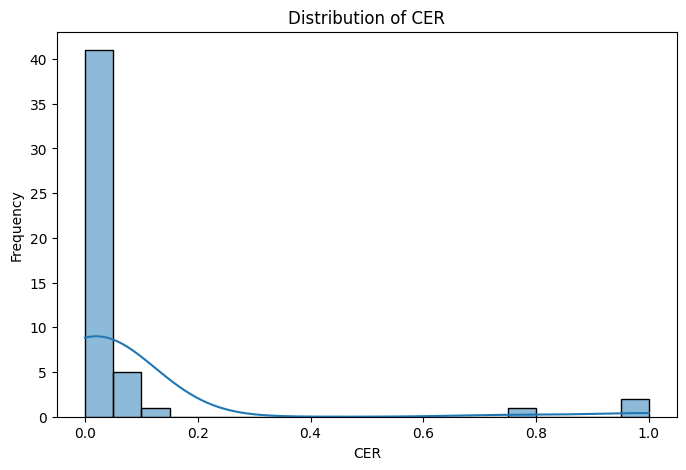

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot WER distribution
plt.figure(figsize=(8,5))
sns.histplot(subset['wer'], bins=20, kde=True)
plt.title('Distribution of WER')
plt.xlabel('WER')
plt.ylabel('Frequency')
plt.show()

# Plot CER distribution
plt.figure(figsize=(8, 5))
sns.histplot(subset['cer'], bins=20, kde=True)
plt.title('Distribution of CER')
plt.xlabel('CER')
plt.ylabel('Frequency')
plt.show()

**Summary:**

1. **Most transcriptions have low CER and WER**
	•	The majority of the data points are concentrated around low error rates (close to 0).

	•	This suggests that the ASR (Automatic Speech Recognition) model performs well on most of the dataset.

2. **Long-Tail Distribution (Presence of Outliers)**
	•	There are some high CER and WER values, creating a long tail towards the right.
	•	This means that some transcriptions are significantly worse than others, possibly due to:
	•	Poor audio quality
	•	Strong accents
	•	Background noise
	•	Rare words not well represented in the training set

3. **CER is lower than WER on average**
	•	This is expected because CER measures errors at the character level, whereas WER measures errors at the word level.
  
	•	A small character-level mistake (e.g., missing a single letter) may not necessarily cause a word-level mistake.


**Step 5: Process and Compare AI vs Human Transcriptions**

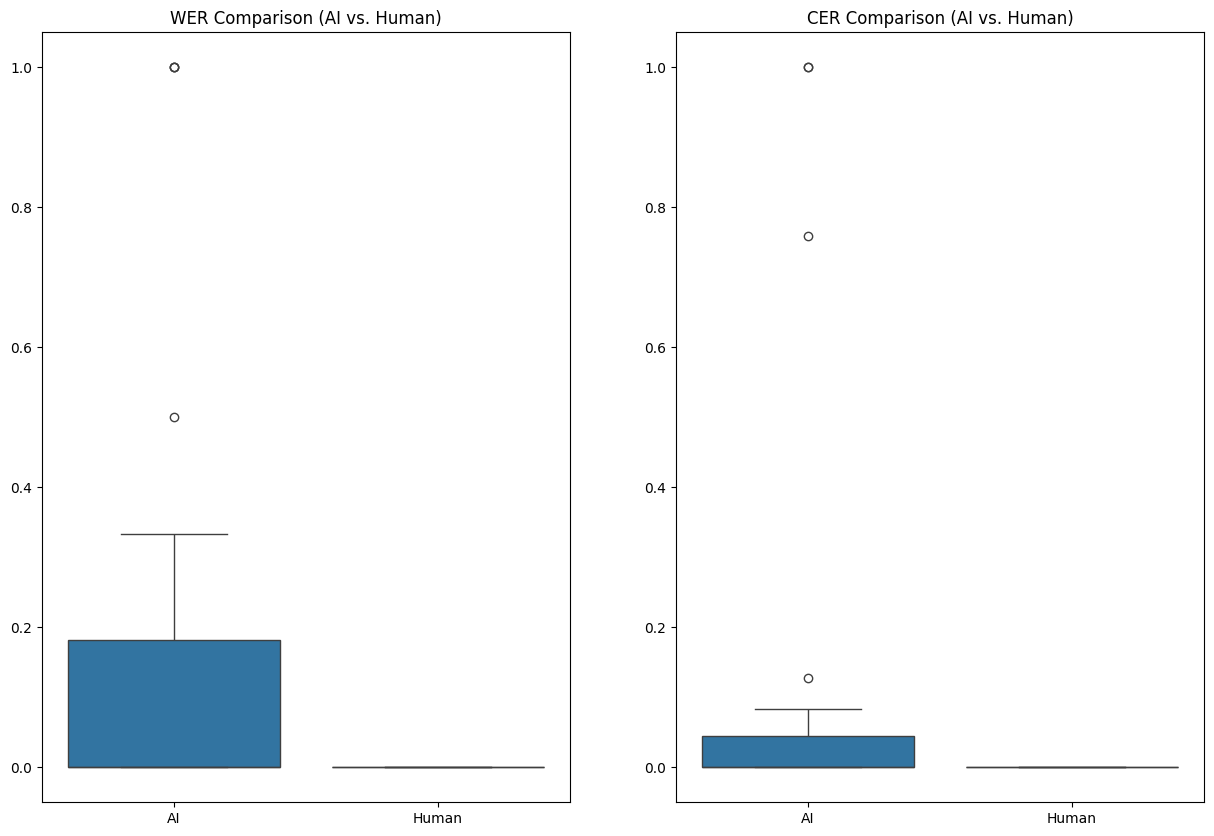

In [41]:

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/M2M Tech/Mozilla Common Voice/ai_transcripts_with_metrics.csv')

# Rename columns for clarity
df.rename(columns={'sentence': 'ground_truth'}, inplace=True)

# Compute WER & CER for AI
df['WER_AI'] = df.apply(lambda row: wer(row['ground_truth'], row['ai_transcript']), axis=1)
df['CER_AI'] = df.apply(lambda row: cer(row['ground_truth'], row['ai_transcript']), axis=1)

# Assign WER & CER = 0 for human reference (since it's the ground truth)
df['WER_Human'] = 0
df['CER_Human'] = 0

# Plot boxplots to visualize the difference
plt.figure(figsize=(15, 10))

# WER Comparison
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['WER_AI', 'WER_Human']])
plt.xticks([0, 1], ['AI', 'Human'])
plt.title("WER Comparison (AI vs. Human)")

# CER Comparison
plt.subplot(1, 2, 2)
sns.boxplot(data=df[['CER_AI', 'CER_Human']])
plt.xticks([0, 1], ['AI', 'Human'])
plt.title("CER Comparison (AI vs. Human)")

plt.show()

**Summary of the Graphs (WER & CER Distribution)**

1. Most AI-generated transcriptions have low error rates, with WER(Word Error Rate) and CER(Character Error Rate) Concentrated around 0.

  This means AI performs well on most samples


2. A smaller portion of cases has extremely high WER(nearly 1.0).

  These colud be outliers, possibly due to noisy audio, uncommon words or poor AI recognition in certain scenarious.


3. The distribution is right-skewed (more low-error cases, fewer high-error cases).

  AI is mostly accurate than WER but fails significantly on some difficult samples.

4. CER is lower than WER, indicating that AI tend to make more word-level mistakes rather han character-level mistakes.

  Example: " The cat ran fast" -> "The cats run fast" (presents word-level error but few character changes: The tense of the verb has changed from past to present, and the subject has changed from singular to plural. WER is more sensitive to these types of errors than CER.)


In [45]:
!sudo apt-get update
!sudo apt-get install texlive-xetex pandoc

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [46]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab_Notebooks/M2M Tech/Capstone 1: Data Analysis of speech-to-text accuracy.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/M2M Tech/Capstone 1: Data Analysis of speech-to-text accuracy.ipynb to pdf
/usr/local/share/jupyter/nbconvert/templates/latex/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['text/html']) is not able to be represented.
  ((*- endblock -*))
[NbConvertApp] Support files will be in Capstone 1: Data Analysis of speech-to-text accuracy_files/
[NbConvertApp] Making directory ./Capstone 1: Data Analysis of speech-to-text accuracy_files
[NbConvertApp] Writing 109494 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 310521 bytes to /content/drive/MyDrive/Colab_Notebooks/M2M Tech/Capstone 1: Data Analysis o